Chapter 6
# 时间数据讲故事
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd

In [ ]:
# ! pip install -U kaleido

In [2]:
# 导入数据
df = px.data.gapminder()
df.rename(columns={"country": "country_or_territory"},
          inplace = True)
# 列名称不够准确
df.to_pickle('gapminder.pkl')
df.to_csv('gapminder.csv')

In [4]:
df.head(10)

country_or_territory continent  year  lifeExp       pop   gdpPercap  \
0          Afghanistan      Asia  1952   28.801   8425333  779.445314   
1          Afghanistan      Asia  1957   30.332   9240934  820.853030   
2          Afghanistan      Asia  1962   31.997  10267083  853.100710   
3          Afghanistan      Asia  1967   34.020  11537966  836.197138   
4          Afghanistan      Asia  1972   36.088  13079460  739.981106   
5          Afghanistan      Asia  1977   38.438  14880372  786.113360   
6          Afghanistan      Asia  1982   39.854  12881816  978.011439   
7          Afghanistan      Asia  1987   40.822  13867957  852.395945   
8          Afghanistan      Asia  1992   41.674  16317921  649.341395   
9          Afghanistan      Asia  1997   41.763  22227415  635.341351   

  iso_alpha  iso_num  
0       AFG        4  
1       AFG        4  
2       AFG        4  
3       AFG        4  
4       AFG        4  
5       AFG        4  
6       AFG        4  
7       AFG        4  
8       AFG        4  
9       AFG        4

In [47]:
len(df)

1704

In [5]:
df.columns

Index(['country_or_territory', 'continent', 'year', 'lifeExp', 'pop',
       'gdpPercap', 'iso_alpha', 'iso_num'],
      dtype='object')

## 人口

In [6]:
df_pop_continent_over_t = df.groupby(['year','continent'], 
                                     as_index=False).agg({'pop': 'sum'})

In [55]:
df_pop_continent_over_t

year continent         pop
0   1952    Africa   237640501
1   1952  Americas   345152446
2   1952      Asia  1395357351
3   1952    Europe   418120846
4   1952   Oceania    10686006
5   1957    Africa   264837738
6   1957  Americas   386953916
7   1957      Asia  1562780599
8   1957    Europe   437890351
9   1957   Oceania    11941976
10  1962    Africa   296516865
11  1962  Americas   433270254
12  1962      Asia  1696357182
13  1962    Europe   460355155
14  1962   Oceania    13283518
15  1967    Africa   335289489
16  1967  Americas   480746623
17  1967      Asia  1905662900
18  1967    Europe   481178958
19  1967   Oceania    14600414
20  1972    Africa   379879541
21  1972  Americas   529384210
22  1972      Asia  2150972248
23  1972    Europe   500635059
24  1972   Oceania    16106100
25  1977    Africa   433061021
26  1977  Americas   578067699
27  1977      Asia  2384513556
28  1977    Europe   517164531
29  1977   Oceania    17239000
30  1982    Africa   499348587
31  1982  Americas   630290920
32  1982      Asia  2610135582
33  1982    Europe   531266901
34  1982   Oceania    18394850
35  1987    Africa   574834110
36  1987  Americas   682753971
37  1987      Asia  2871220762
38  1987    Europe   543094160
39  1987   Oceania    19574415
40  1992    Africa   659081517
41  1992  Americas   739274104
42  1992      Asia  3133292191
43  1992    Europe   558142797
44  1992   Oceania    20919651
45  1997    Africa   743832984
46  1997  Americas   796900410
47  1997      Asia  3383285500
48  1997    Europe   568944148
49  1997   Oceania    22241430
50  2002    Africa   833723916
51  2002  Americas   849772762
52  2002      Asia  3601802203
53  2002    Europe   578223869
54  2002   Oceania    23454829
55  2007    Africa   929539692
56  2007  Americas   898871184
57  2007      Asia  3811953827
58  2007    Europe   586098529
59  2007   Oceania    24549947

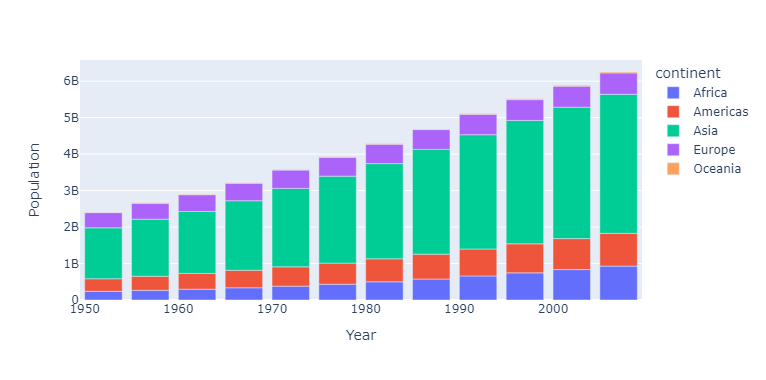

In [10]:
fig = px.bar(df_pop_continent_over_t, 
             x = 'year', y = 'pop', 
             width=600, height=380,
             color = 'continent',
             labels={"year": "Year",
                     "pop": "Population"})
fig.write_image("各大洲人口随时间变化，柱状图.svg")
fig.show()

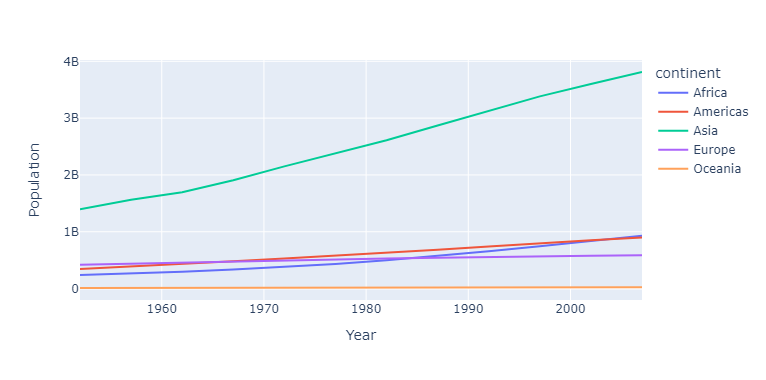

In [11]:
fig = px.line(df_pop_continent_over_t, 
             x = 'year', y = 'pop', 
             width=600, height=380,
             color = 'continent',
             labels={"year": "Year",
                     "pop": "Population"})
fig.write_image("各大洲人口随时间变化，线图.svg")
fig.show()

In [20]:
# 步骤1: 计算每年全球的总人口
global_pop = df.groupby('year')['pop'].sum().reset_index()

# 步骤2: 计算每个大洲每年的总人口
continent_pop = df.groupby(['continent', 'year'])['pop'].sum().reset_index()

# 步骤3: 合并数据，计算比例
pop_with_ratio = pd.merge(continent_pop, 
                          global_pop, 
                          on='year', 
                          suffixes=('_continent', '_global'))
pop_with_ratio['ratio'] = pop_with_ratio['pop_continent'] / pop_with_ratio['pop_global']

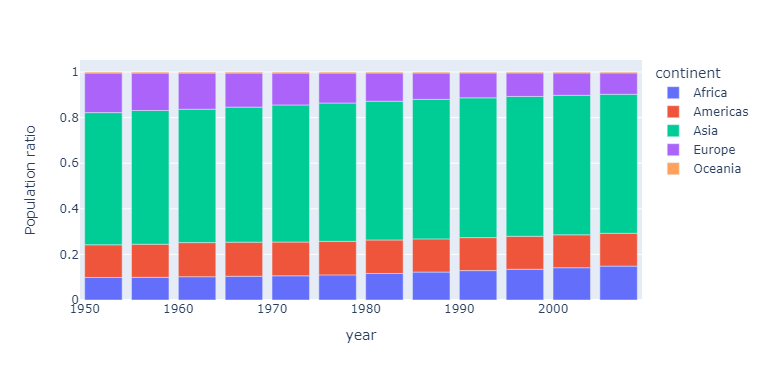

In [31]:
# 使用Plotly绘制叠加填充线图
fig = px.bar(pop_with_ratio, 
              x="year", y="ratio", 
              color="continent", 
              width=600, height=380,
              labels={"ratio": "Population ratio"})
fig.write_image("各大洲人口占比随时间变化，堆积柱状图.svg")
fig.show()

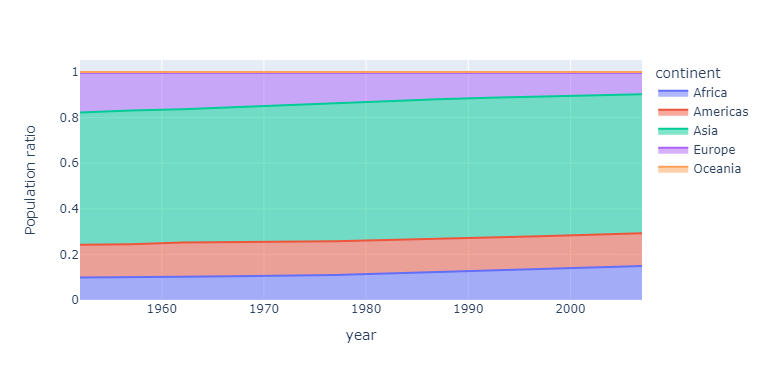

In [22]:
# 使用Plotly绘制叠加填充线图
fig = px.area(pop_with_ratio, 
              x="year", y="ratio", 
              color="continent", 
              width=600, height=380,
              labels={"ratio": "Population ratio"})
fig.write_image("各大洲人口占比随时间变化，面积图.svg")
fig.show()

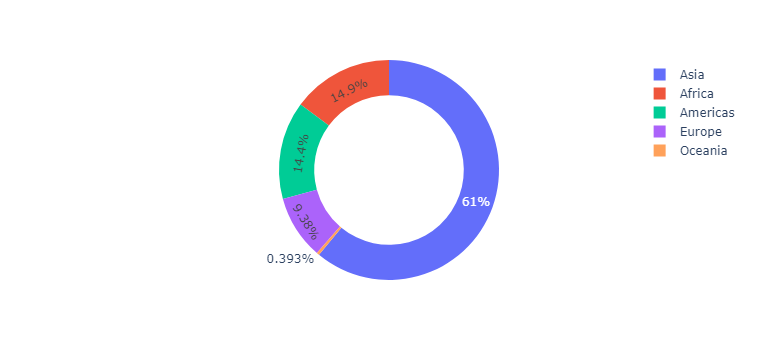

In [33]:

continent_population_2007 = df[df['year'] == 2007].groupby('continent')['pop'].sum().reset_index()

fig = px.pie(continent_population_2007, 
             values='pop', 
             hole = 0.68,
             names='continent')
fig.write_image("各大洲人口比例，2007年.svg")
fig.show()

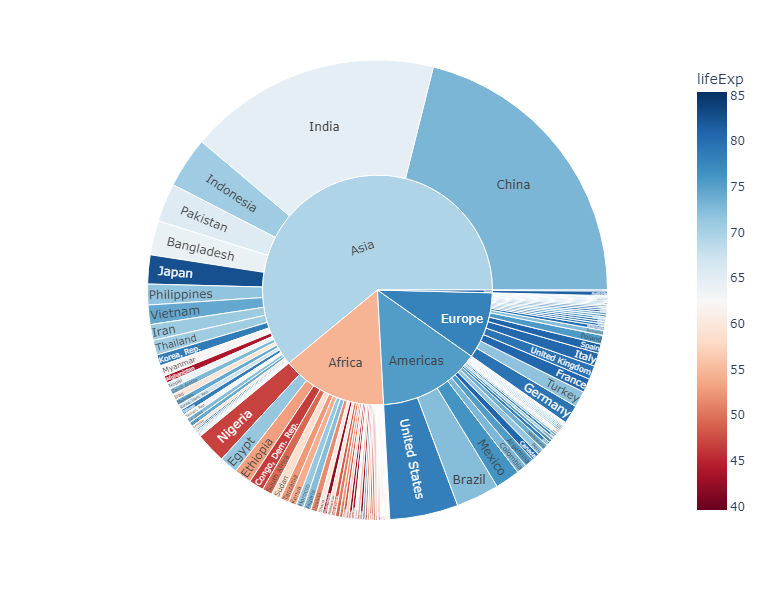

In [38]:

fig = px.sunburst(df.query("year == 2007"), 
                  path=['continent', 'country_or_territory'], 
                  values='pop',
                  color='lifeExp', 
                  width=600, height=600,
                  hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], 
                                                       weights=df['pop']))
fig.write_image("人口比例，太阳爆炸图，2007年.svg")
fig.show()

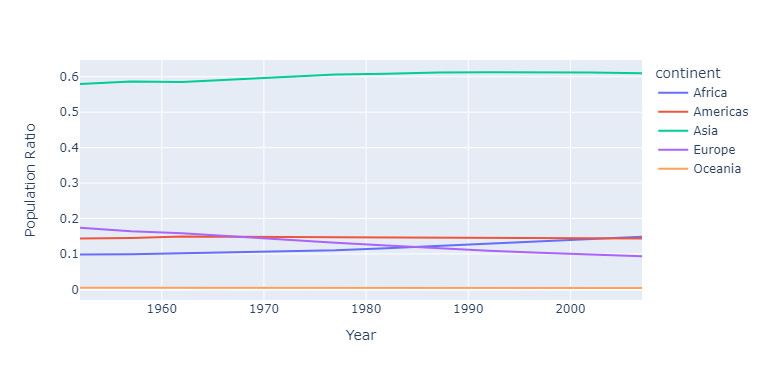

In [36]:
fig = px.line(pop_with_ratio, 
             x = 'year', y = 'ratio', 
             width=600, height=380,
             color = 'continent',
             labels={"year": "Year",
                     "ratio": "Population Ratio"})
fig.write_image("各大洲人口占比随时间变化，线图.svg")
fig.show()

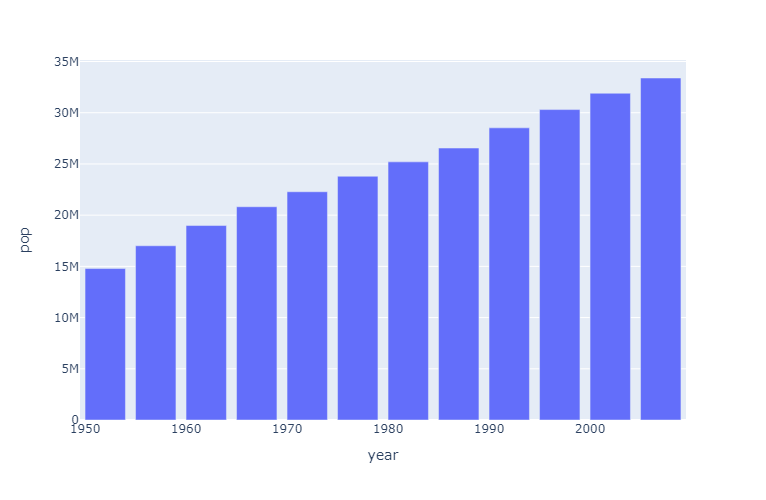

In [12]:
# create bar charts 
fig = px.bar(df.query("country_or_territory == 'Canada'"), 
             x='year', y='pop', 
             width=600, height=500)
fig.write_image("特定国家 (加拿大) 人口随年份变化.svg")
fig.show() 

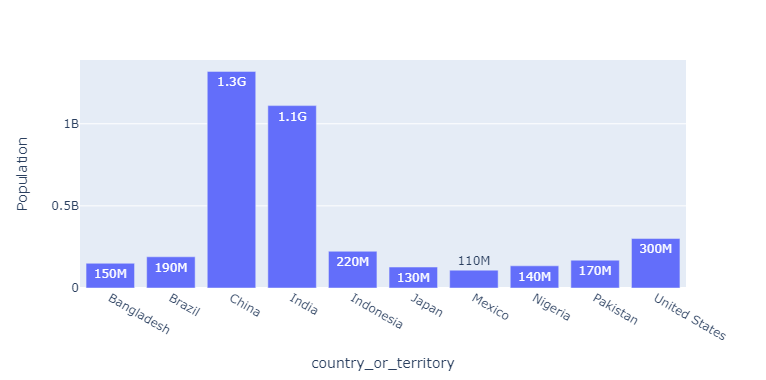

In [39]:

fig = px.bar(df.query("year == 2007 and pop > 1.e8"), 
             y='pop', x='country_or_territory', 
             width=600, height=380,
             labels={"year": "Year","pop": "Population"},
             text_auto='.2s')
fig.write_image("人口超过一亿的国家，2007年.svg")
fig.show()

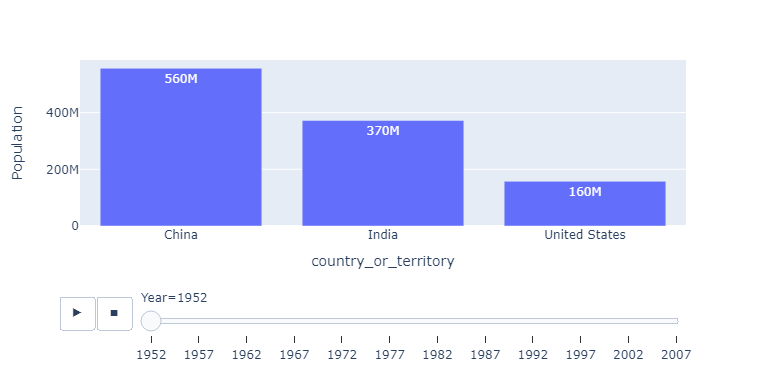

In [30]:
# 超过1亿人口，动画
fig = px.bar(df.query("pop > 1.e8").sort_values(['year','country_or_territory']), 
             y='pop', x='country_or_territory', 
             width=600, height=380,
             animation_frame='year', 
             labels={"year": "Year","pop": "Population"},
             text_auto='.2s')
fig.show()

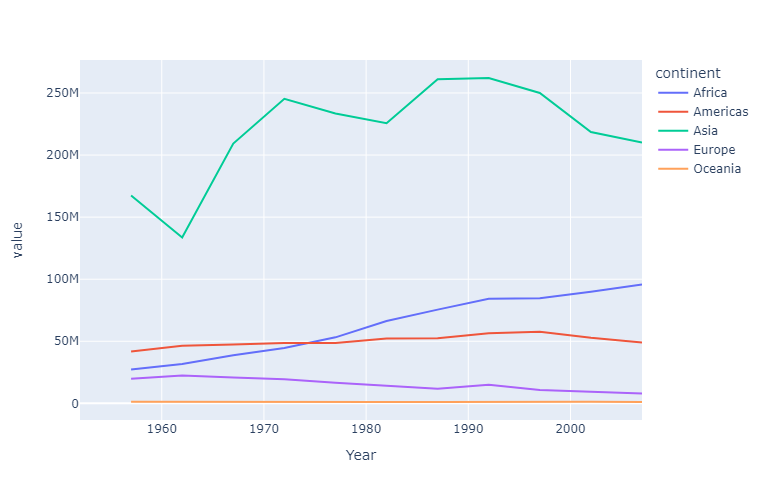

In [42]:
fig = px.line(df_wide.diff(), 
             width=600, height=500,
             color = 'continent',
             labels={"year": "Year",
                     "pop": "Population"})
fig.write_image("各大洲人口年度变化，线图.svg")
fig.show()

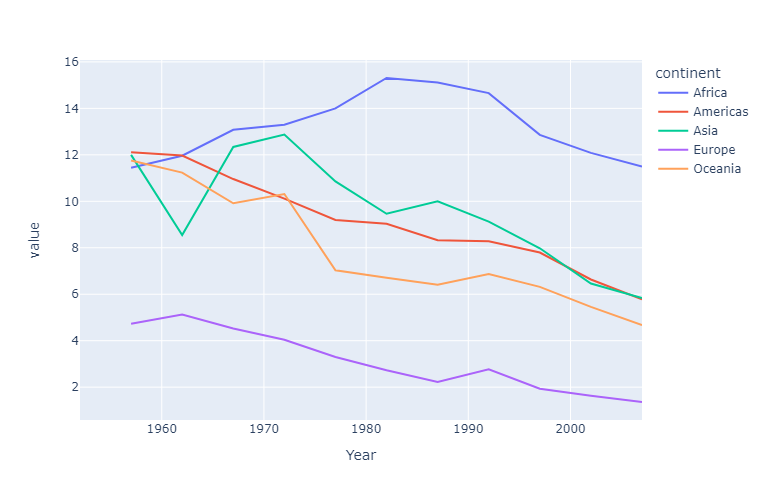

In [41]:
# 百分比变化
fig = px.line(df_wide.pct_change() * 100, 
             width=600, height=500,
             color = 'continent',
             labels={"year": "Year",
                     "pop": "Population"})
fig.write_image("各大洲人口年度百分比变化，线图.svg")
fig.show()

In [61]:
df_pop_ctr_over_t = df.groupby(['year','country_or_territory'], 
                                     as_index=False).agg({'pop': 'sum'}).pivot(index='year', 
                                        columns='country_or_territory', 
                                        values='pop')

In [62]:
df_pop_ctr_over_t

country_or_territory  Afghanistan  Albania   Algeria    Angola  Argentina  \
year                                                                        
1952                      8425333  1282697   9279525   4232095   17876956   
1957                      9240934  1476505  10270856   4561361   19610538   
1962                     10267083  1728137  11000948   4826015   21283783   
1967                     11537966  1984060  12760499   5247469   22934225   
1972                     13079460  2263554  14760787   5894858   24779799   
1977                     14880372  2509048  17152804   6162675   26983828   
1982                     12881816  2780097  20033753   7016384   29341374   
1987                     13867957  3075321  23254956   7874230   31620918   
1992                     16317921  3326498  26298373   8735988   33958947   
1997                     22227415  3428038  29072015   9875024   36203463   
2002                     25268405  3508512  31287142  10866106   38331121   
2007                     31889923  3600523  33333216  12420476   40301927   

country_or_territory  Australia  Austria  Bahrain  Bangladesh   Belgium  ...  \
year                                                                     ...   
1952                    8691212  6927772   120447    46886859   8730405  ...   
1957                    9712569  6965860   138655    51365468   8989111  ...   
1962                   10794968  7129864   171863    56839289   9218400  ...   
1967                   11872264  7376998   202182    62821884   9556500  ...   
1972                   13177000  7544201   230800    70759295   9709100  ...   
1977                   14074100  7568430   297410    80428306   9821800  ...   
1982                   15184200  7574613   377967    93074406   9856303  ...   
1987                   16257249  7578903   454612   103764241   9870200  ...   
1992                   17481977  7914969   529491   113704579  10045622  ...   
1997                   18565243  8069876   598561   123315288  10199787  ...   
2002                   19546792  8148312   656397   135656790  10311970  ...   
2007                   20434176  8199783   708573   150448339  10392226  ...   

country_or_territory    Uganda  United Kingdom  United States  Uruguay  \
year                                                                     
1952                   5824797        50430000      157553000  2252965   
1957                   6675501        51430000      171984000  2424959   
1962                   7688797        53292000      186538000  2598466   
1967                   8900294        54959000      198712000  2748579   
1972                  10190285        56079000      209896000  2829526   
1977                  11457758        56179000      220239000  2873520   
1982                  12939400        56339704      232187835  2953997   
1987                  15283050        56981620      242803533  3045153   
1992                  18252190        57866349      256894189  3149262   
1997                  21210254        58808266      272911760  3262838   
2002                  24739869        59912431      287675526  3363085   
2007                  29170398        60776238      301139947  3447496   

country_or_territory  Venezuela   Vietnam  West Bank and Gaza  Yemen, Rep.  \
year                                                                         
1952                    5439568  26246839             1030585      4963829   
1957                    6702668  28998543             1070439      5498090   
1962                    8143375  33796140             1133134      6120081   
1967                    9709552  39463910             1142636      6740785   
1972                   11515649  44655014             1089572      7407075   
1977                   13503563  50533506             1261091      8403990   
1982                   15620766  56142181             1425876      9657618   
1987                   17910182  62826491             1691210

In [63]:
pop_pct_change = df_pop_ctr_over_t.pct_change() * 100
pop_pct_change

country_or_territory  Afghanistan    Albania    Algeria     Angola  Argentina  \
year                                                                            
1952                          NaN        NaN        NaN        NaN        NaN   
1957                     9.680341  15.109414  10.682993   7.780213   9.697300   
1962                    11.104386  17.042408   7.108385   5.802084   8.532377   
1967                    12.378229  14.809185  15.994540   8.732961   7.754458   
1972                    13.360188  14.086973  15.675625  12.337167   8.047248   
1977                    13.769009  10.845511  16.205213   4.543231   8.894459   
1982                   -13.430820  10.802862  16.795790  13.852897   8.736885   
1987                     7.655295  10.619198  16.078879  12.226326   7.769043   
1992                    17.666366   8.167505  13.087176  10.944029   7.393931   
1997                    36.214748   3.052459  10.546820  13.038434   6.609498   
2002                    13.681258   2.347524   7.619448  10.036249   5.876946   
2007                    26.204733   2.622508   6.539664  14.304756   5.141530   

country_or_territory  Australia   Austria    Bahrain  Bangladesh   Belgium  \
year                                                                         
1952                        NaN       NaN        NaN         NaN       NaN   
1957                  11.751606  0.549787  15.117022    9.551949  2.963276   
1962                  11.144312  2.354397  23.950092   10.656617  2.550742   
1967                   9.979613  3.466181  17.641377   10.525457  3.667665   
1972                  10.989783  2.266545  14.154574   12.634787  1.596819   
1977                   6.808075  0.321161  28.860485   13.664651  1.160767   
1982                   7.887538  0.081695  27.086177   15.723444  0.351290   
1987                   7.066879  0.056637  20.278225   11.485257  0.140996   
1992                   7.533427  4.434230  16.470969    9.579734  1.777289   
1997                   6.196473  1.957140  13.044603    8.452350  1.534649   
2002                   5.287025  0.971960   9.662507   10.008088  1.099856   
2007                   4.539794  0.631677   7.948848   10.903655  0.778280   

country_or_territory  ...     Uganda  United Kingdom  United States   Uruguay  \
year                  ...                                                       
1952                  ...        NaN             NaN            NaN       NaN   
1957                  ...  14.604869        1.982947       9.159457  7.634118   
1962                  ...  15.179325        3.620455       8.462415  7.155049   
1967                  ...  15.756652        3.128049       6.526284  5.776985   
1972                  ...  14.493802        2.037883       5.628246  2.945049   
1977                  ...  12.438053        0.178320       4.927678  1.554819   
1982                  ...  12.931343        0.286057       5.425395  2.800642   
1987                  ...  18.112509        1.139367       4.572030  3.085853   
1992                  ...  19.427667        1.552657       5.803316  3.418843   
1997                  ...  16.206625        1.627746       6.235085  3.606432   
2002                  ...  16.641078        1.877568       5.409721  3.072387   
2007                  ...  17.908458        1.441783       4.680419  2.509928   

country_or_territory  Venezuela    Vietnam  West Bank and Gaza  Yemen, Rep.  \
year                                                                          
1952                        NaN        NaN                 NaN          NaN   
1957                  23.220594  10.483944            3.867124    10.763082   
1962                  21.494530  16.544269            5.856943    11.312856   
1967                  19.232530  16.770466            0.838559    10.142088   
1972                  18.601239  13.154054           -4.643999     9.884457   
1977                  17.262718  13.164237           15.741869    13.458956   
1982 

In [69]:
pop_pct_change_ = pop_pct_change.melt(value_name = 'pop_pct_change', ignore_index = False).reset_index()

In [82]:
# 定义异常变化的阈值
upper_threshold = 35
lower_threshold = -5

# 筛选出变化率异常的国家和年份
abnormal_pop_changes = pop_pct_change_[(pop_pct_change_['pop_pct_change'] > upper_threshold) | 
                                       (pop_pct_change_['pop_pct_change'] < lower_threshold)]

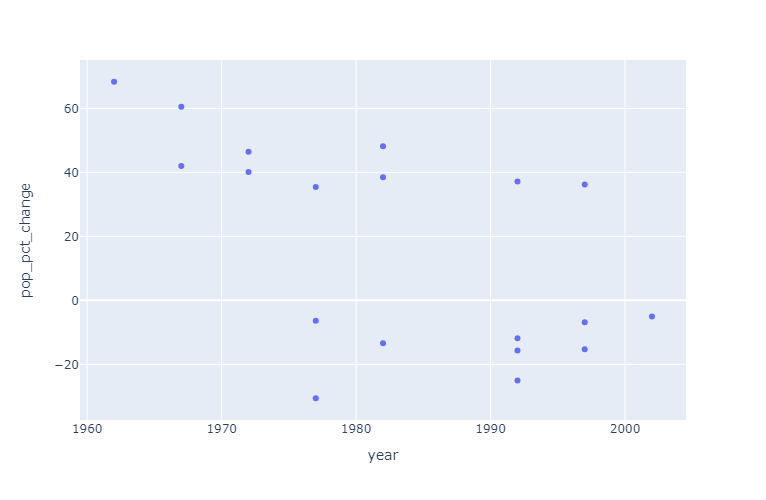

In [83]:

fig = px.scatter(abnormal_pop_changes, 
                 x='year', y='pop_pct_change', 
                 width=600, height=500,
                 hover_name='country_or_territory', )
fig.write_image("人口年度变化异常.svg")
fig.show()

## 人均GDP

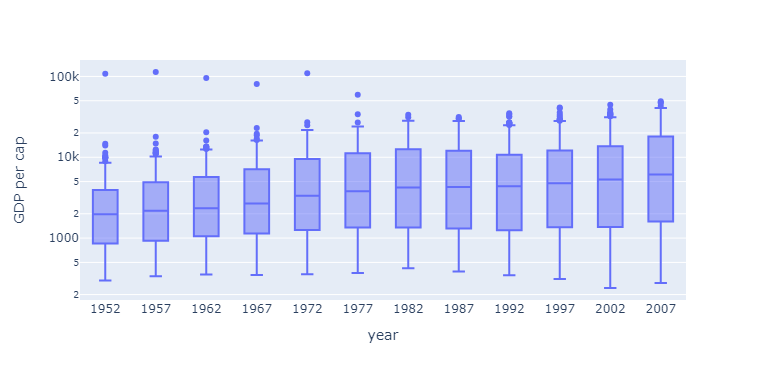

In [4]:
# 使用Plotly Express绘制箱形图
fig = px.box(df, x="year", y="gdpPercap", 
             labels={"gdpPercap": "GDP per cap"},
             width=600, height=380, log_y = True,
             hover_data=['country_or_territory'])

fig.update_layout(xaxis={'type': 'category'})  
# 将x轴作为分类轴处理，以避免年份之间的空隙
fig.write_image("全球人均GPD，box plot.svg")
fig.show()

In [90]:
# 计算加权人均GDP（人均GDP乘以人口）
df['weighted_gdpPercap'] = df['pop'] * df['gdpPercap']

# 按大洲和年份分组，计算加权人均GDP总和和总人口
continent_year_sum = df.groupby(['continent', 'year']).agg({'weighted_gdpPercap':'sum', 'pop':'sum'}).reset_index()

# 计算人口加权平均人均GDP
continent_year_sum['weighted_avg_gdpPercap'] = continent_year_sum['weighted_gdpPercap'] / continent_year_sum['pop']

# 选取结果展示
continent_year_sum[['continent', 'year', 'weighted_avg_gdpPercap']]

continent  year  weighted_avg_gdpPercap
0     Africa  1952             1311.221439
1     Africa  1957             1444.951993
2     Africa  1962             1540.599054
3     Africa  1967             1774.847446
4     Africa  1972             2063.171343
5     Africa  1977             2244.798509
6     Africa  1982             2295.191944
7     Africa  1987             2180.764349
8     Africa  1992             2071.614521
9     Africa  1997             2098.865031
10    Africa  2002             2201.907081
11    Africa  2007             2560.929570
12  Americas  1952             8528.043082
13  Americas  1957             9097.792750
14  Americas  1962             9760.251707
15  Americas  1967            11329.644371
16  Americas  1972            12663.731452
17  Americas  1977            14015.892498
18  Americas  1982            14410.568073
19  Americas  1987            16091.000896
20  Americas  1992            16566.920780
21  Americas  1997            18279.991447
22  Americas  2002            19453.689651
23  Americas  2007            21602.745752
24      Asia  1952              806.359867
25      Asia  1957              998.108922
26      Asia  1962             1169.869588
27      Asia  1967             1465.842219
28      Asia  1972             1908.313631
29      Asia  1977             2211.556090
30      Asia  1982             2458.170637
31      Asia  1987             2778.921529
32      Asia  1992             3234.398773
33      Asia  1997             3780.562600
34      Asia  2002             4196.620537
35      Asia  2007             5432.371665
36    Europe  1952             6096.659060
37    Europe  1957             7535.414166
38    Europe  1962             9057.226247
39    Europe  1967            10808.866738
40    Europe  1972            13104.843067
41    Europe  1977            14813.517173
42    Europe  1982            15782.128148
43    Europe  1987            17483.568975
44    Europe  1992            18420.191889
45    Europe  1997            20227.307119
46    Europe  2002            22644.282180
47    Europe  2007            25244.047885
48   Oceania  1952            10136.102103
49   Oceania  1957            11191.921339
50   Oceania  1962            12396.784232
51   Oceania  1967            14514.501244
52   Oceania  1972            16653.579604
53   Oceania  1977            17948.571398
54   Oceania  1982            19155.051700
55   Oceania  1987            21400.543924
56   Oceania  1992            22593.032726
57   Oceania  1997            26014.896990
58   Oceania  2002            29438.447850
59   Oceania  2007            32884.555271

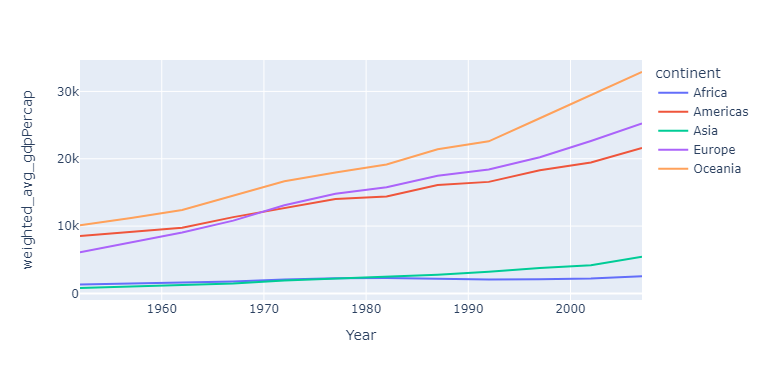

In [91]:
fig = px.line(continent_year_sum[['continent', 'year', 'weighted_avg_gdpPercap']], 
             x = 'year', y = 'weighted_avg_gdpPercap', 
             width=600, height=380,
             color = 'continent',
             labels={"year": "Year",
                     "pop": "Population"})
fig.write_image("各大洲人口加权人均GDP，线图.svg")
fig.show()

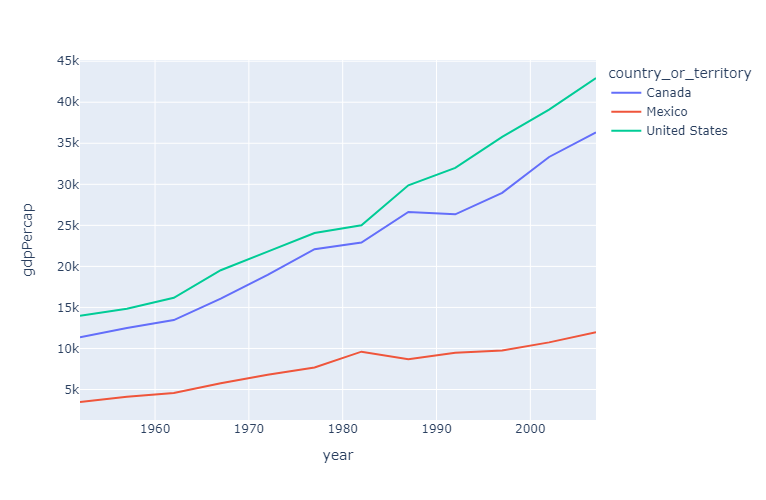

In [92]:
# create bar charts 
fig = px.line(df.query("country_or_territory == ['Canada','United States', 'Mexico']"), 
              x='year', y='gdpPercap', 
              color = 'country_or_territory',
              width=600, height=500)
fig.write_image("特定国家人均GDP随时间变化，2007年.svg")
fig.show() 

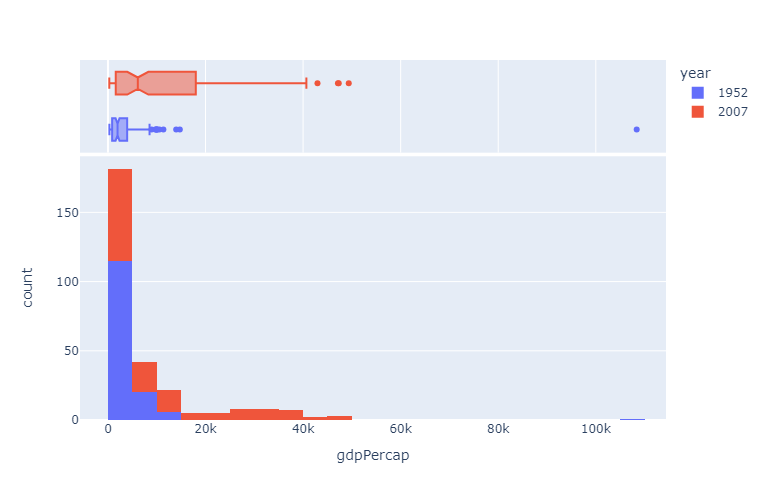

In [23]:
fig = px.histogram(
    df.query("year == 1952 or year == 2007"),
    x="gdpPercap",
    marginal="box",
    color="year",
    width=600, height=500)
fig.write_image("对比1952年和2007年收入分布，直方图.svg")
fig.show()

In [93]:
# 对数据按国家和年份排序，为计算变化率做准备
df = df.sort_values(['country_or_territory', 'year'])

# 计算每个国家的年度人均GDP变化率
df['gdpPercap_change'] = df.groupby('country_or_territory')['gdpPercap'].pct_change() * 100

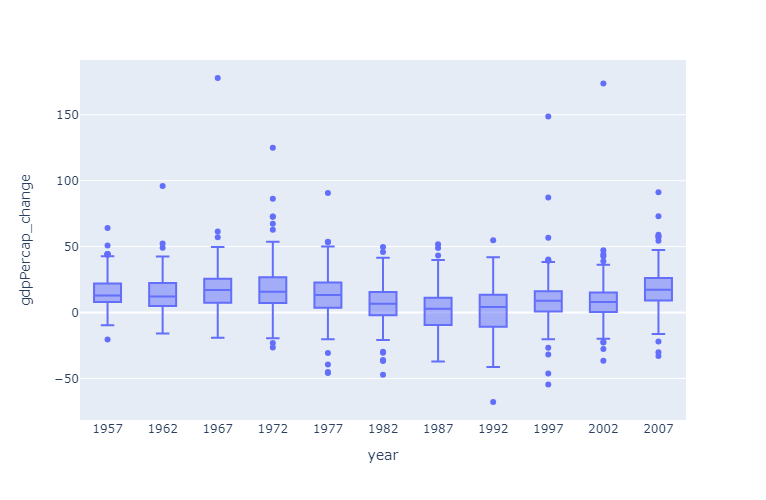

In [98]:
# 使用Plotly Express绘制箱形图
fig = px.box(df, x="year", y="gdpPercap_change", 
             width=600, height=500,
             hover_data=['country_or_territory'])

fig.update_layout(xaxis={'type': 'category'})  
# 将x轴作为分类轴处理，以避免年份之间的空隙
fig.write_image("全球人均GPD变化百分比，box plot.svg")
fig.show()

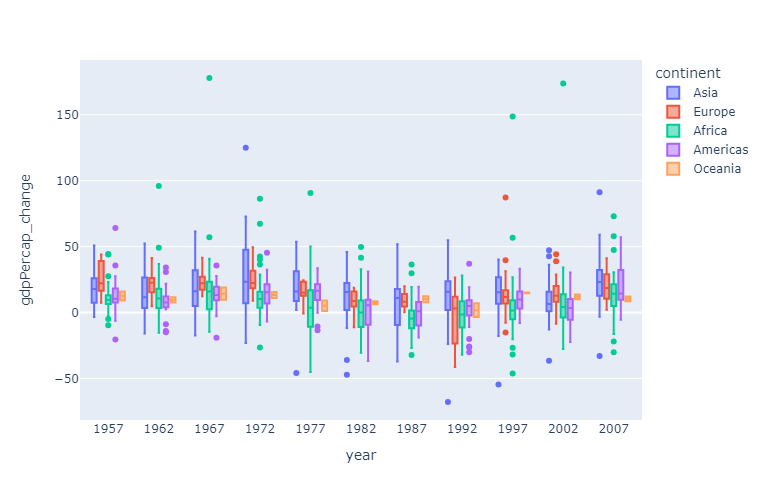

In [99]:
# 使用Plotly Express绘制箱形图
fig = px.box(df, x="year", y="gdpPercap_change", 
             width=800, height=500, color="continent",
             hover_data=['country_or_territory'])

fig.update_layout(xaxis={'type': 'category'})  
# 将x轴作为分类轴处理，以避免年份之间的空隙
fig.write_image("各大洲人均GPD变化百分比，box plot.svg")
fig.show()

In [100]:
# 定义异常变化的阈值，例如年度变化率的绝对值大于40%
upper_threshold = 50
lower_threshold = -30

# 筛选出变化率异常的国家和年份
abnormal_gdp_changes = df[(df['gdpPercap_change'] > upper_threshold) | 
                          (df['gdpPercap_change'] < lower_threshold)]

In [101]:
abnormal_gdp_changes

country_or_territory continent  year  lifeExp         pop  \
20                   Albania    Europe  1992   71.581     3326498   
41                    Angola    Africa  1977   39.483     6162675   
47                    Angola    Africa  2007   42.731    12420476   
152   Bosnia and Herzegovina    Europe  1992   72.178     4256013   
153   Bosnia and Herzegovina    Europe  1997   73.244     3607000   
160                 Botswana    Africa  1972   56.024      619351   
227                 Cambodia      Asia  2007   59.723    14131858   
236                 Cameroon    Africa  1992   54.314    12467171   
299                    China      Asia  2007   72.961  1318683096   
317                  Comoros    Africa  1977   50.939      304739   
332         Congo, Dem. Rep.    Africa  1992   45.548    41672143   
333         Congo, Dem. Rep.    Africa  1997   42.587    47798986   
380                  Croatia    Europe  1992   72.527     4494013   
483        Equatorial Guinea    Africa  1967   38.987      259864   
489        Equatorial Guinea    Africa  1997   48.245      439971   
490        Equatorial Guinea    Africa  2002   49.348      495627   
491        Equatorial Guinea    Africa  2007   51.579      551201   
501                  Eritrea    Africa  1997   53.378     4058319   
545                    Gabon    Africa  1977   52.790      706367   
546                    Gabon    Africa  1982   56.564      753874   
724                     Iran      Asia  1972   55.234    30614000   
726                     Iran      Asia  1982   59.620    43072751   
733                     Iraq      Asia  1957   48.437     6248643   
737                     Iraq      Asia  1977   60.413    11882916   
740                     Iraq      Asia  1992   59.461    17861905   
760                   Israel      Asia  1972   71.630     3095893   
781                  Jamaica  Americas  1957   62.610     1535090   
794                    Japan      Asia  1962   68.730    95831757   
796                    Japan      Asia  1972   73.420   107188273   
832         Korea, Dem. Rep.      Asia  1972   63.983    14781241   
837         Korea, Dem. Rep.      Asia  1997   67.727    21585105   
845              Korea, Rep.      Asia  1977   64.766    36436000   
847              Korea, Rep.      Asia  1987   69.810    41622000   
857                   Kuwait      Asia  1977   69.343     1140357   
858                   Kuwait      Asia  1982   71.309     1497494   
881                  Lesotho    Africa  1977   52.208     1251524   
902                    Libya    Africa  1962   47.808     1441863   
903                    Libya    Africa  1967   50.227     1759224   
907                    Libya    Africa  1987   66.234     3799845   
1016              Montenegro    Europe  1992   75.435      621621   
1037              Mozambique    Africa  1977   42.495    11127868   
1055                 Myanmar      Asia  2007   62.069    47761980   
1110               Nicaragua  Americas  1982   59.298     2979423   
1132                 Nigeria    Africa  1972   42.821    53740085   
1155                    Oman      Asia  1967   46.988      714775   
1156                    Oman      Asia  1972   52.143      829050   
1208                    Peru  Americas  1992   66.458    22430449   
1280                 Romania    Europe  1992   69.360    22797027   
1315            Saudi Arabia      Asia  1987   66.295    14619745   
1340                  Serbia    Europe  1992   71.659     9826397   
1353            Sierra Leone    Africa  1997   39.897     4578212   
1360               Singapore      Asia  1972   69.521     2152400   
1504                  Taiwan      Asia  1972   69.390    15226039   
1532                Thailand      Asia  1992   67.298    56667095   
1559     Trinidad and Tobago  Americas  2007   69.819     1056608   
1666      West Bank and Gaza      Asia  2002   72.370     3389578   
1667      West Bank and Gaza      Asia  2007   73.422     4018332   
1703  

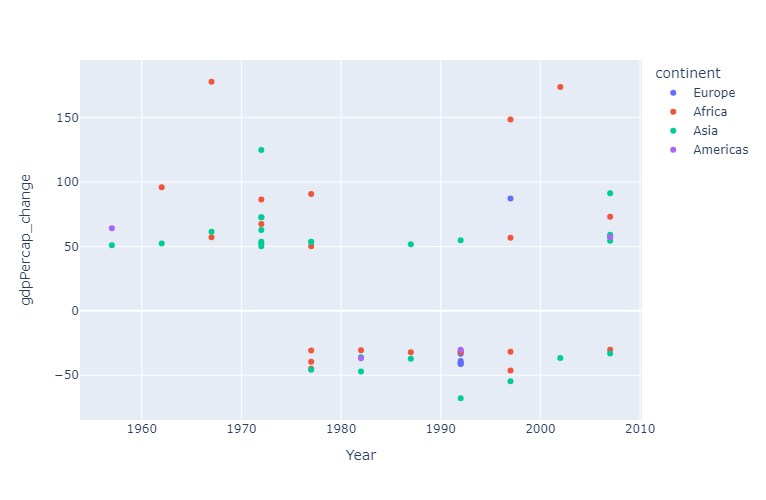

In [102]:
# 使用Plotly绘制变化异常国家的人均GDP随时间的变化
fig = px.scatter(abnormal_gdp_changes, 
                 x='year', y='gdpPercap_change', 
                 color='continent',
                 width=600, height=500,
                 hover_name='country_or_territory', 
                 labels={'gdpPercap': 'GDP per Capita', 'year': 'Year'})
fig.write_image("变化异常国家的人均GDP随时间的变化.svg")
fig.show()

## 预期寿命

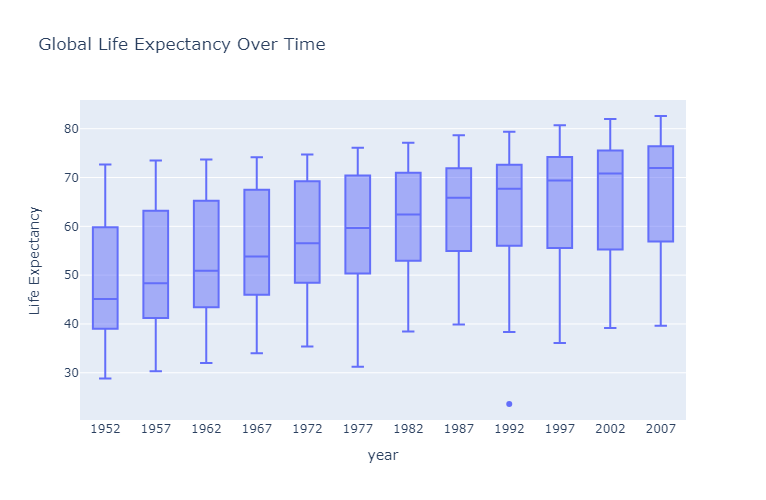

In [103]:
# 使用Plotly Express绘制箱形图
fig = px.box(df, x="year", y="lifeExp", 
             labels={"lifeExp": "Life Expectancy"},
             width=600, height=500,
             title="Global Life Expectancy Over Time")

fig.update_layout(xaxis={'type': 'category'})  # 将x轴作为分类轴处理，以避免年份之间的空隙
fig.write_image("全球人均预期寿命，box.svg")
fig.show()

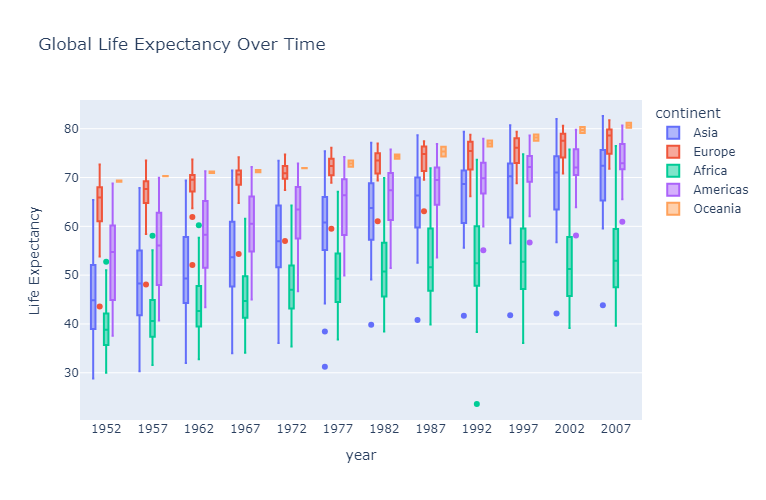

In [104]:
# 使用Plotly Express绘制箱形图
fig = px.box(df, x="year", y="lifeExp", 
             labels={"lifeExp": "Life Expectancy"},
             width=800, height=500,
             color = 'continent',
             hover_name='country_or_territory', 
             title="Global Life Expectancy Over Time")

fig.update_layout(xaxis={'type': 'category'})  # 将x轴作为分类轴处理，以避免年份之间的空隙
fig.write_image("各大洲人均预期寿命，box.svg")
fig.show()

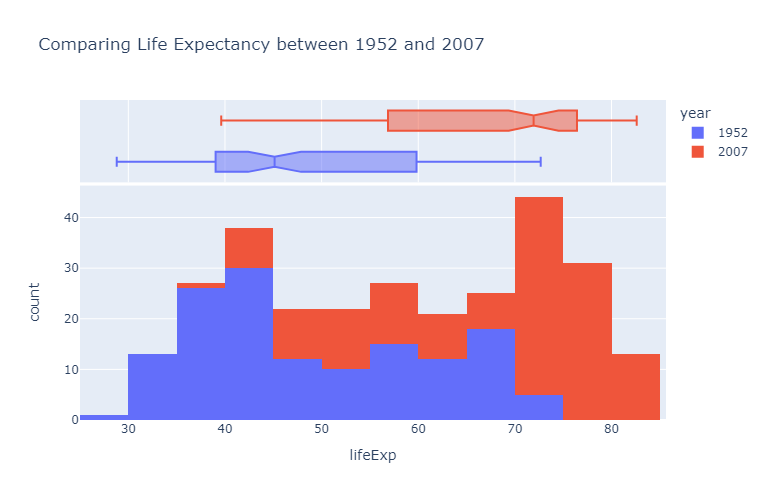

In [51]:
fig = px.histogram(
    df.query("year == 1952 or year == 2007"),
    x="lifeExp",
    marginal = 'box',
    color="year",
    width=600, height=500,
    title="Comparing Life Expectancy between 1952 and 2007"
)
fig.write_image("比较1952和2007全球寿命预期分布，box.svg")
fig.show()

In [50]:
df.pivot_table(values='lifeExp', index=df.year, columns='country', aggfunc='first')

country  Afghanistan  Albania  Algeria  Angola  Argentina  Australia  Austria  \
year                                                                            
1952          28.801   55.230   43.077  30.015     62.485     69.120   66.800   
1957          30.332   59.280   45.685  31.999     64.399     70.330   67.480   
1962          31.997   64.820   48.303  34.000     65.142     70.930   69.540   
1967          34.020   66.220   51.407  35.985     65.634     71.100   70.140   
1972          36.088   67.690   54.518  37.928     67.065     71.930   70.630   
1977          38.438   68.930   58.014  39.483     68.481     73.490   72.170   
1982          39.854   70.420   61.368  39.942     69.942     74.740   73.180   
1987          40.822   72.000   65.799  39.906     70.774     76.320   74.940   
1992          41.674   71.581   67.744  40.647     71.868     77.560   76.040   
1997          41.763   72.950   69.152  40.963     73.275     78.830   77.510   
2002          42.129   75.651   70.994  41.003     74.340     80.370   78.980   
2007          43.828   76.423   72.301  42.731     75.320     81.235   79.829   

country  Bahrain  Bangladesh  Belgium  ...  Uganda  United Kingdom  \
year                                   ...                           
1952      50.939      37.484   68.000  ...  39.978          69.180   
1957      53.832      39.348   69.240  ...  42.571          70.420   
1962      56.923      41.216   70.250  ...  45.344          70.760   
1967      59.923      43.453   70.940  ...  48.051          71.360   
1972      63.300      45.252   71.440  ...  51.016          72.010   
1977      65.593      46.923   72.800  ...  50.350          72.760   
1982      69.052      50.009   73.930  ...  49.849          74.040   
1987      70.750      52.819   75.350  ...  51.509          75.007   
1992      72.601      56.018   76.460  ...  48.825          76.420   
1997      73.925      59.412   77.530  ...  44.578          77.218   
2002      74.795      62.013   78.320  ...  47.813          78.471   
2007      75.635      64.062   79.441  ...  51.542          79.425   

country  United States  Uruguay  Venezuela  Vietnam  West Bank and Gaza  \
year                                                                      
1952            68.440   66.071     55.088   40.412              43.160   
1957            69.490   67.044     57.907   42.887              45.671   
1962            70.210   68.253     60.770   45.363              48.127   
1967            70.760   68.468     63.479   47.838              51.631   
1972            71.340   68.673     65.712   50.254              56.532   
1977            73.380   69.481     67.456   55.764              60.765   
1982            74.650   70.805     68.557   58.816              64.406   
1987            75.020   71.918     70.190   62.820              67.046   
1992            76.090   72.752     71.150   67.662              69.718   
1997            76.810   74.223     72.146   70.672              71.096   
2002            77.310   75.307     72.766   73.017              72.370   
2007            78.242   76.384     73.747   74.249              73.422   

country  Yemen, Rep.  Zambia  Zimbabwe  
year                                    
1952          32.548  42.038    48.451  
1957          33.970  44.077    50.469  
1962          35.180  46.023    52.358  
1967          36.984  47.768    53.995  
1972          39.848  50.107    55.635  
1977          44.175  51.386    57.674  
1982          49.113  51.821    60.363  
1987          52.922  50.821    62.351  
1992          55.599  46.100    60.377  
1997          58.020  40.238    46.809  
2002          60.308  39.193    39.989  
2007          62.698  42.384    43.487  

[12 rows x 142 columns]

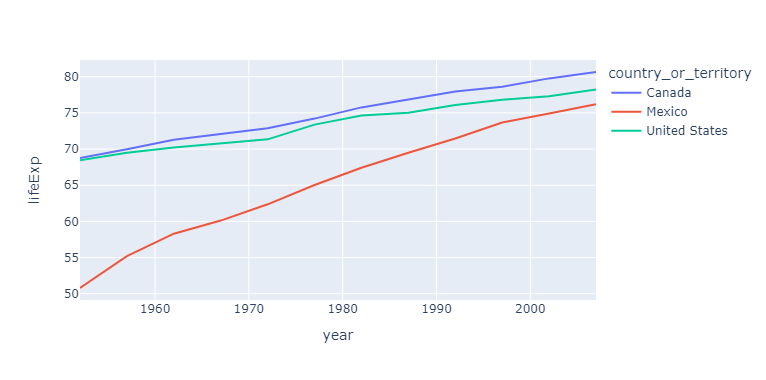

In [105]:
# create bar charts 
fig = px.line(df.query("country_or_territory == ['Canada','United States','Mexico'] "), 
             x='year', y='lifeExp', color = 'country_or_territory',
             width=600, height=380)
fig.write_image("三国平均预期寿命随时间变化.svg")
fig.show() 

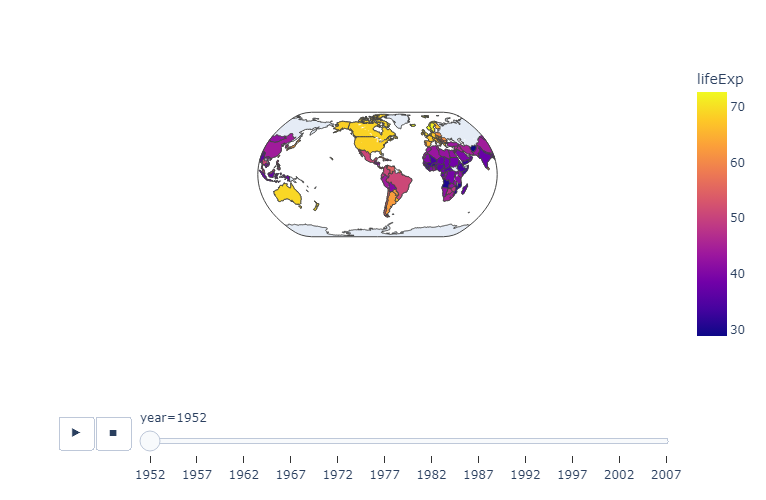

In [18]:
# create a map using choropleth
fig = px.choropleth(df, locations='iso_alpha', 
                    color='lifeExp', 
                    hover_name='country_or_territory', 
                    animation_frame='year', 
                    width=600, height=500,
                    color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
fig.show() 

In [106]:
# 步骤1: 计算加权寿命
df['weighted_lifeExp'] = df['pop'] * df['lifeExp']

# 步骤2 & 3: 计算每个大洲的加权寿命总和和总人口
continent_sum = df.groupby('continent').agg({'weighted_lifeExp':'sum', 'pop':'sum'}).reset_index()

# 步骤4: 计算加权平均寿命
continent_sum['weighted_avg_lifeExp'] = continent_sum['weighted_lifeExp'] / continent_sum['pop']

# 结果
continent_sum[['continent', 'weighted_avg_lifeExp']]

continent  weighted_avg_lifeExp
0    Africa             50.592792
1  Americas             69.506911
2      Asia             61.118560
3    Europe             72.307180
4   Oceania             75.489544

In [107]:
# 计算加权寿命
df['weighted_lifeExp'] = df['pop'] * df['lifeExp']

# 按大洲和年份分组，计算加权寿命总和和总人口
continent_year_sum = df.groupby(['continent', 'year']).agg({'weighted_lifeExp':'sum', 'pop':'sum'}).reset_index()

# 计算加权平均寿命
continent_year_sum['weighted_avg_lifeExp'] = continent_year_sum['weighted_lifeExp'] / continent_year_sum['pop']

# 选取结果展示
# continent_year_sum[['continent', 'year', 'weighted_avg_lifeExp']]

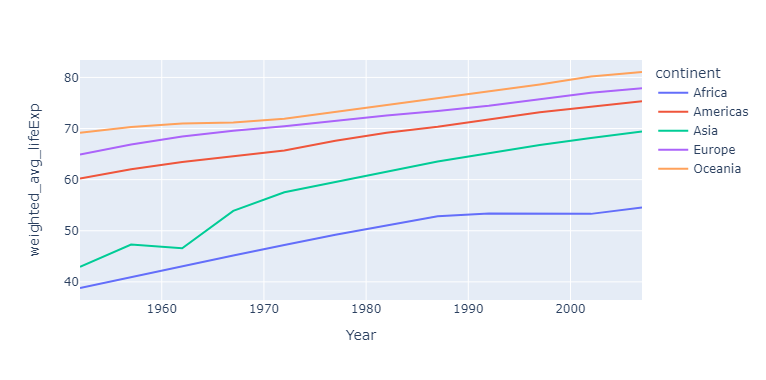

In [109]:
fig = px.line(continent_year_sum[['continent', 'year', 'weighted_avg_lifeExp']], 
             x = 'year', y = 'weighted_avg_lifeExp', 
             width=600, height=380,
             color = 'continent',
             labels={"year": "Year",
                     "pop": "Population"})
fig.write_image("各大洲平均寿命随时间变化，box.svg")
fig.show()

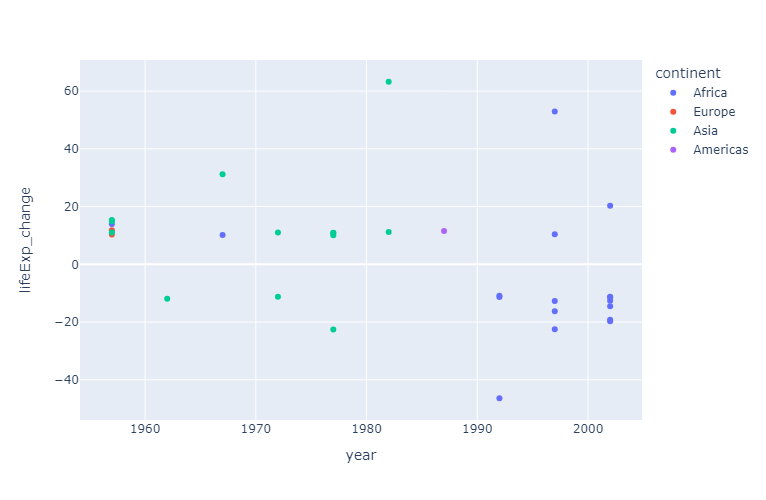

In [111]:
# 步骤1: 计算每个国家每年的平均寿命变化率
# 首先对数据按国家和年份排序
df = df.sort_values(['country_or_territory', 'year'])

# 计算每个国家的年度寿命变化率
df['lifeExp_change'] = df.groupby('country_or_territory')['lifeExp'].pct_change() * 100

# 步骤2: 定义异常变化的阈值（这里假设为年度变化率的绝对值大于5%）
threshold = 10

# 步骤3: 筛选出变化率异常的国家和年份
abnormal_changes = df[df['lifeExp_change'].abs() > threshold]

# 步骤4: 可视化异常国家的平均寿命随时间的变化
fig = px.scatter(abnormal_changes, 
                 width=600, height=500,
                 x='year', y='lifeExp_change', color='continent',
                 hover_name='country_or_territory')
fig.write_image("预期寿命，年度异常变化.svg")
fig.show()

## 人均GDP和预期寿命关系

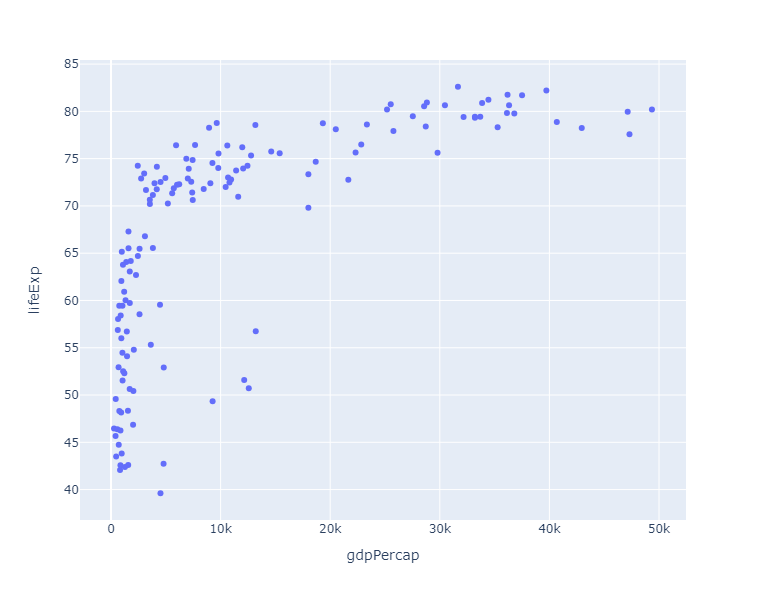

In [124]:

fig = px.scatter(df.query("year == 2007"), 
                 width=600, height=600,
                 x='gdpPercap', y='lifeExp')
fig.write_image("人均GDP和预期寿命关系，2007年.svg")
fig.show() 

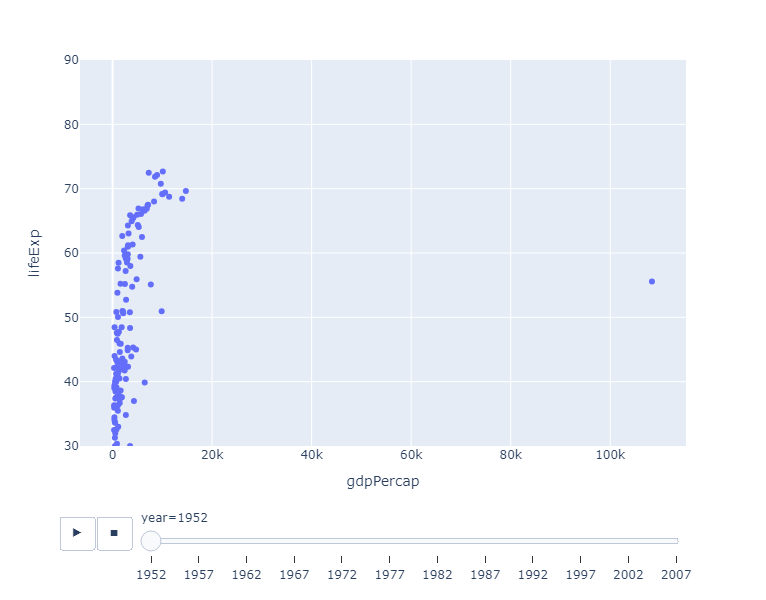

In [129]:

fig = px.scatter(df, 
                 width=600, height=600,
                 animation_frame='year', 
                 hover_name = 'country_or_territory',
                 x='gdpPercap', y='lifeExp')
fig.update_yaxes(range=[30,90])
# fig.write_image("人均GDP和预期寿命关系，2007年.svg")
fig.show() 

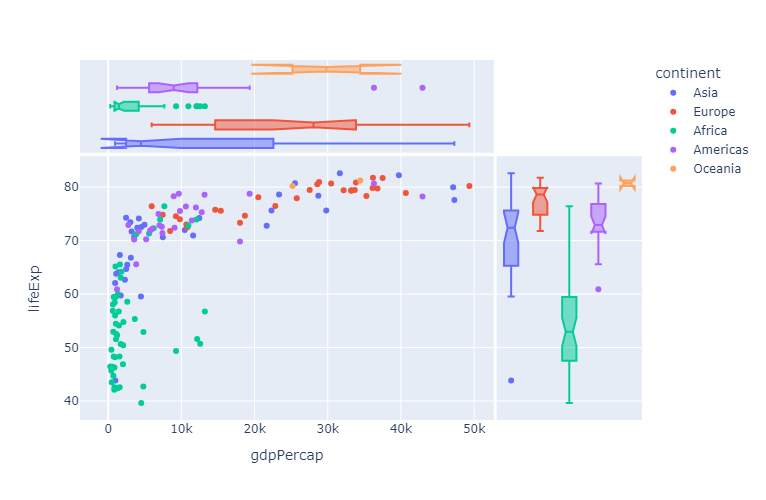

In [130]:
fig = px.scatter(df.query("year == 2007"), 
                 x='gdpPercap', y='lifeExp', 
                 color='continent',
                 width=600, height=500,
                 marginal_x = 'box', marginal_y = 'box')
fig.write_image("人均GDP和预期寿命关系，边际box.svg")
fig.show() 

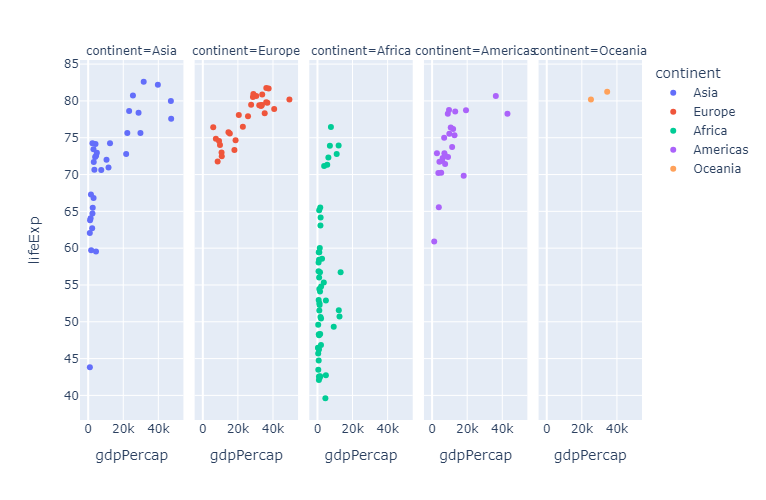

In [131]:
# color by continent 
fig = px.scatter(df.query("year == 2007"), 
                 width=800, height=500,
                 x='gdpPercap', y='lifeExp', 
                 facet_col="continent",
                 color='continent')
fig.write_image("人均GDP和预期寿命关系，2007年，各大洲子图.svg")
fig.show() 

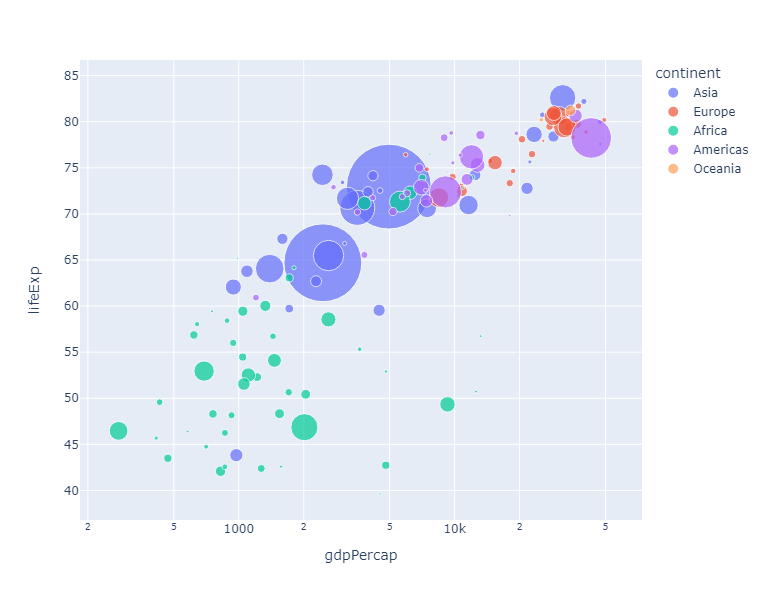

In [133]:
fig = px.scatter(df.query("year==2007"), 
                 x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 width=600, height=600,
                 hover_name="country_or_territory", 
                 log_x=True, size_max=60)
fig.write_image("人均GDP和预期寿命关系，全球，气泡图，2007.svg")
fig.show()

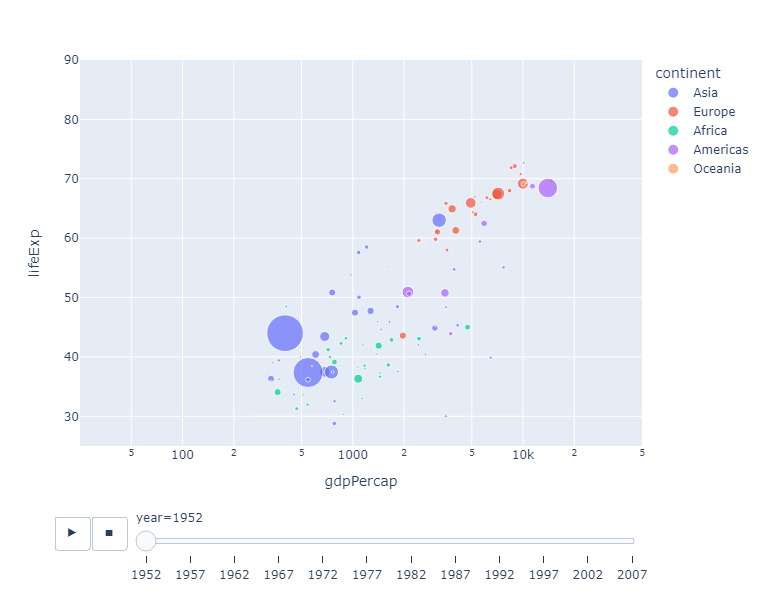

In [138]:
# let's add animation 
fig = px.scatter(df, 
                 x='gdpPercap', y='lifeExp', 
                 color='continent', size='pop', 
                 size_max=40, 
                 width=600, height=600,
                 hover_name='country_or_territory', 
                 log_x=True, animation_frame='year',
                 animation_group='country_or_territory', 
                 range_x=[25, 50000], range_y=[25,90])
fig.show()

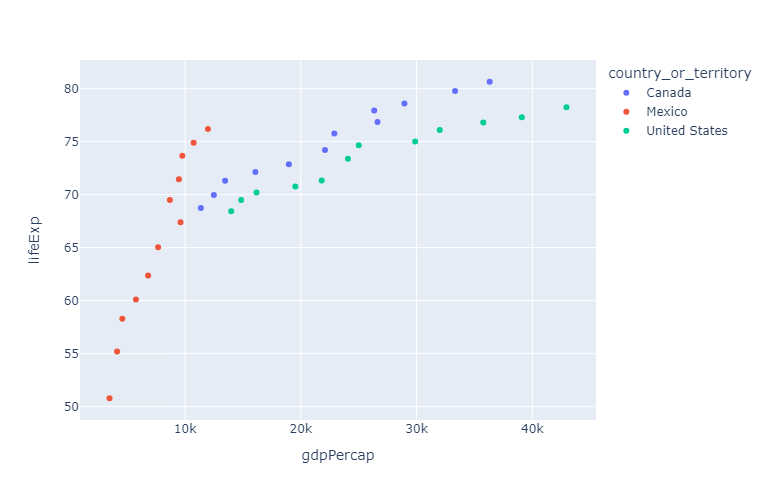

In [140]:
fig = px.scatter(df.query("country_or_territory in ('Canada', 'United States', 'Mexico')"), 
                 x="gdpPercap", y="lifeExp",
                 color = 'country_or_territory',
                 hover_name="country_or_territory", 
                 width=600, height=500,
                 size_max=60)
fig.write_image("人均GDP和预期寿命关系，三国.svg")
fig.show()

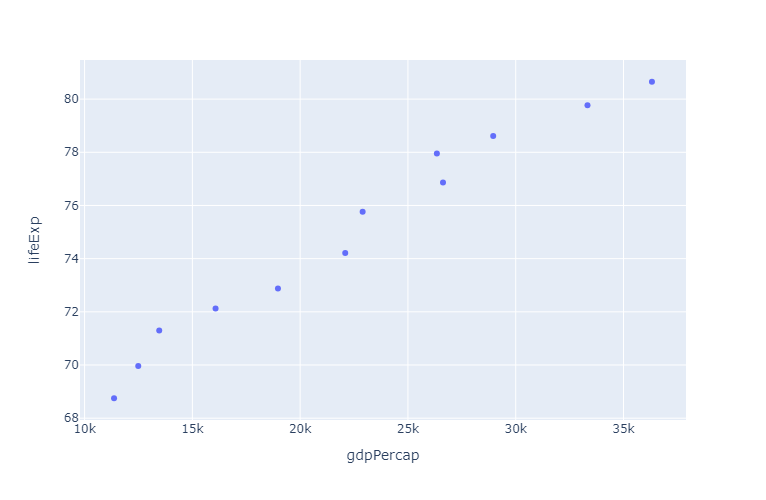

In [115]:
fig = px.scatter(df.query("country_or_territory=='Canada'"), 
                 x="gdpPercap", y="lifeExp",
                 width=600, height=500,
        # size="pop", color="continent",
                 # size = 'pop',
                 hover_name="country_or_territory", 
                 # log_x=True, 
                 size_max=60)
fig.write_image("人均GDP和预期寿命关系，加拿大.svg")
fig.show()

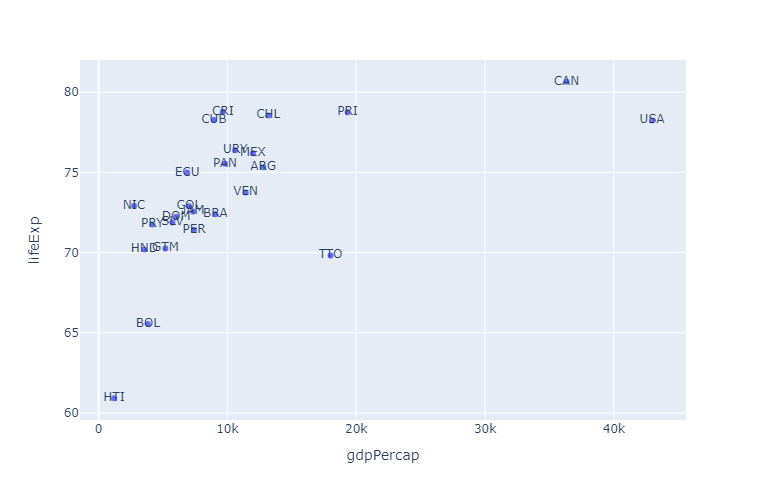

In [9]:
# Scatter plot to show relationship between health and wealth

fig = px.scatter(
    df.query("continent == 'Americas' and year == 2007"),
    x="gdpPercap",
    y="lifeExp",
    text="iso_alpha",
    width=600, height=500,
    hover_name="country_or_territory")
fig.write_image("人均GDP和预期寿命关系，美洲，2007.svg")
fig.show()

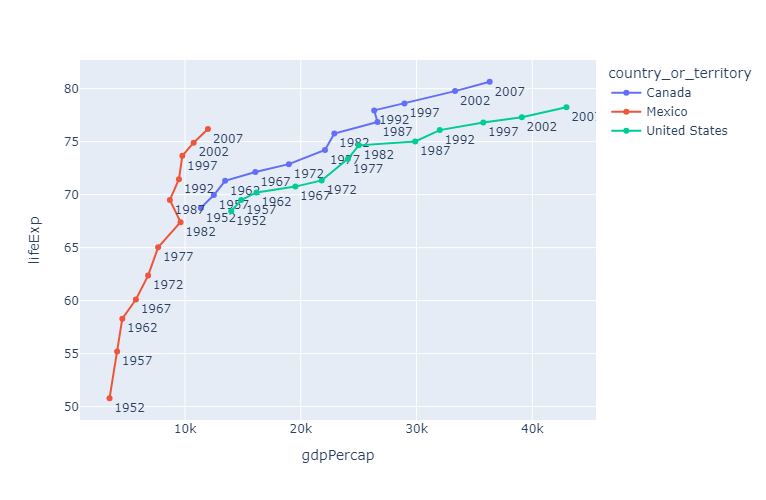

In [5]:
fig = px.line(df.query("country_or_territory in ['Canada', 'United States', 'Mexico']"), 
              y="lifeExp", x="gdpPercap", 
              width=600, height=500,
              color="country_or_territory", text="year")
fig.update_traces(textposition="bottom right")
fig.write_image("人均GDP和预期寿命关系，轨迹图，第1组.svg")
fig.show()

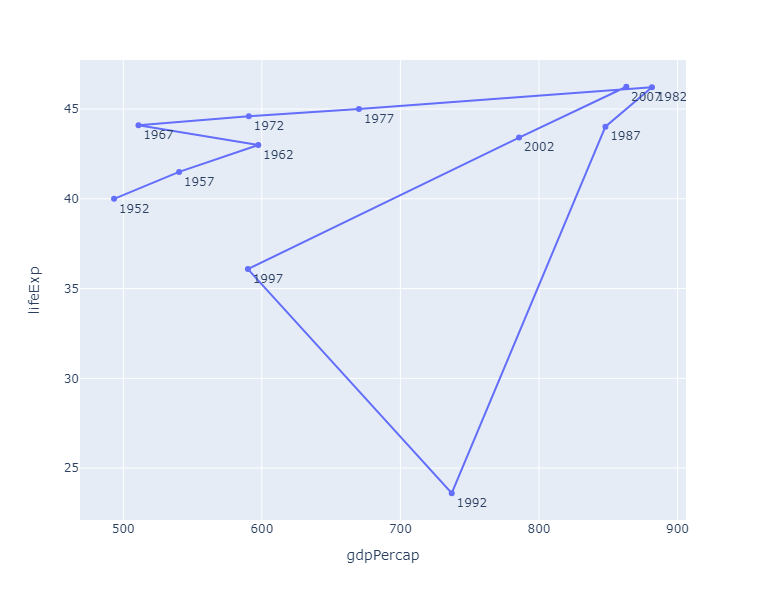

In [6]:
fig = px.line(df.query("country_or_territory == 'Rwanda'"), 
              y="lifeExp", x="gdpPercap", 
              width=600, height=600,
              text="year")
fig.update_traces(textposition="bottom right")
fig.write_image("人均GDP和预期寿命关系，轨迹图，Rwanda.svg")
fig.show()

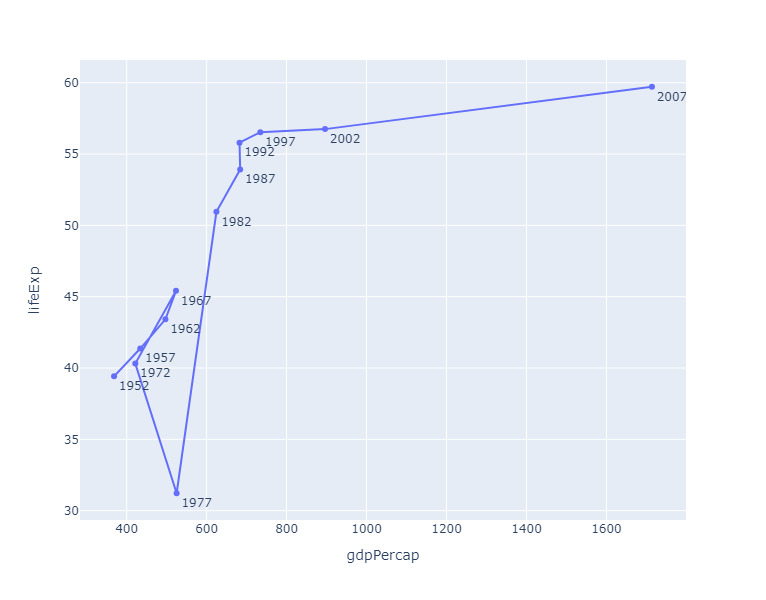

In [7]:
fig = px.line(df.query("country_or_territory == 'Cambodia'"), 
              y="lifeExp", x="gdpPercap", 
              width=600, height=600,
              text="year")
fig.update_traces(textposition="bottom right")
fig.write_image("人均GDP和预期寿命关系，轨迹图，Cambodia.svg")
fig.show()

## 回归

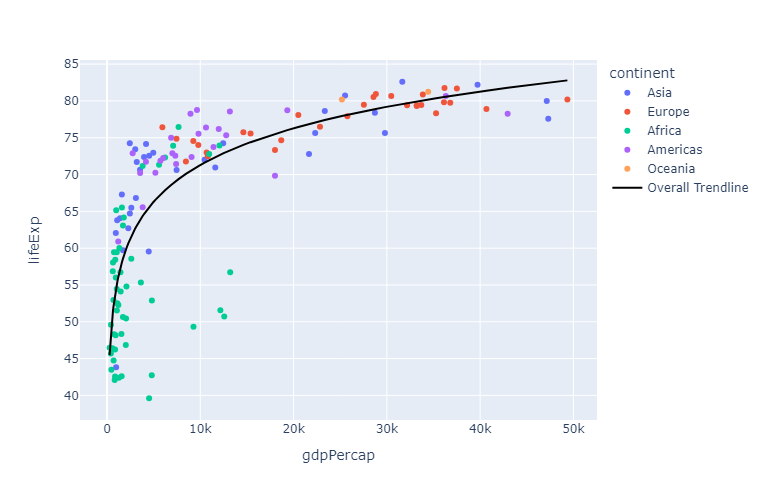

In [145]:
fig = px.scatter(df.query("year == 2007"), 
                 x="gdpPercap", y="lifeExp", 
                 color="continent", 
                 trendline="ols", 
                 width=600, height=500,
                 trendline_options=dict(log_x=True),
                 trendline_scope="overall", 
                 trendline_color_override="black")
fig.write_image("人均GDP和预期寿命关系，2007年，非线性回归.svg")
fig.show()

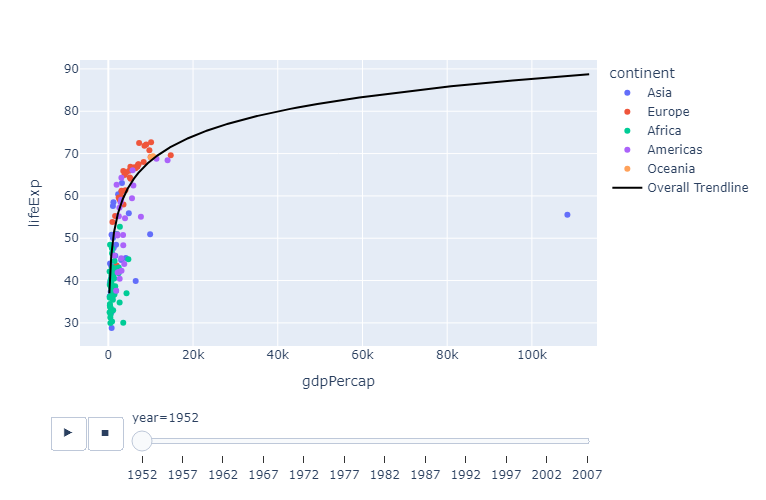

In [144]:
fig = px.scatter(df, 
                 x="gdpPercap", y="lifeExp", 
                 color="continent", 
                 trendline="ols", 
                 animation_frame='year', 
                 width=600, height=500,
                 trendline_options=dict(log_x=True),
                 trendline_scope="overall", 
                 trendline_color_override="black")
# fig.write_image("人均GDP和预期寿命关系，2007年，非线性回归.svg")
fig.show()

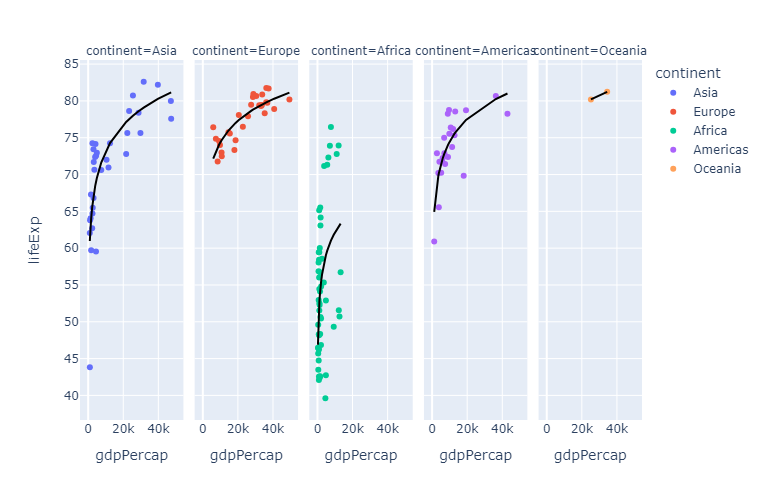

In [147]:
fig = px.scatter(df.query("year == 2007"), 
                 x="gdpPercap", y="lifeExp", 
                 color="continent", 
                 width=800, height=500,
                 trendline="ols", trendline_options=dict(log_x=True),facet_col="continent", 
                 trendline_color_override="black", 
                 hover_data = 'country_or_territory')
fig.write_image("人均GDP和预期寿命关系，2007年，非线性回归，各大洲子图.svg")
fig.show()

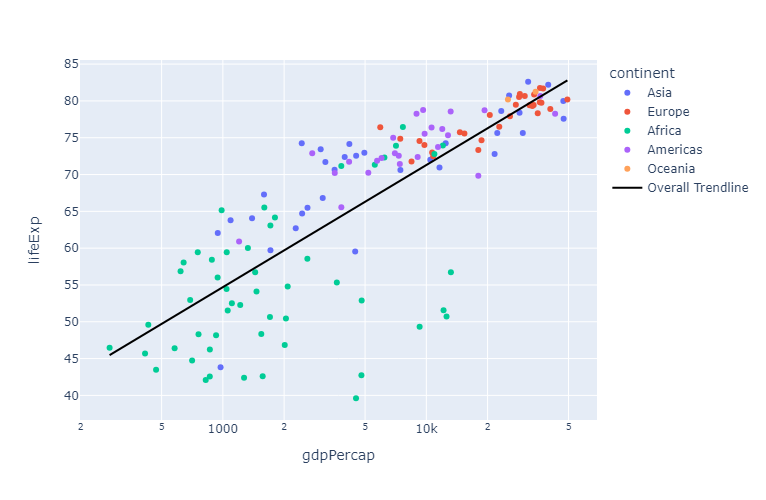

In [146]:
fig = px.scatter(df.query("year == 2007"), 
                 x="gdpPercap", y="lifeExp", 
                 color="continent", 
                 log_x = True,
                 trendline="ols", 
                 width=600, height=500,
                 trendline_options=dict(log_x=True),
                 trendline_scope="overall", 
                 trendline_color_override="black")
fig.write_image("人均GDP和预期寿命关系，2007年，横轴取对数.svg")
fig.show()

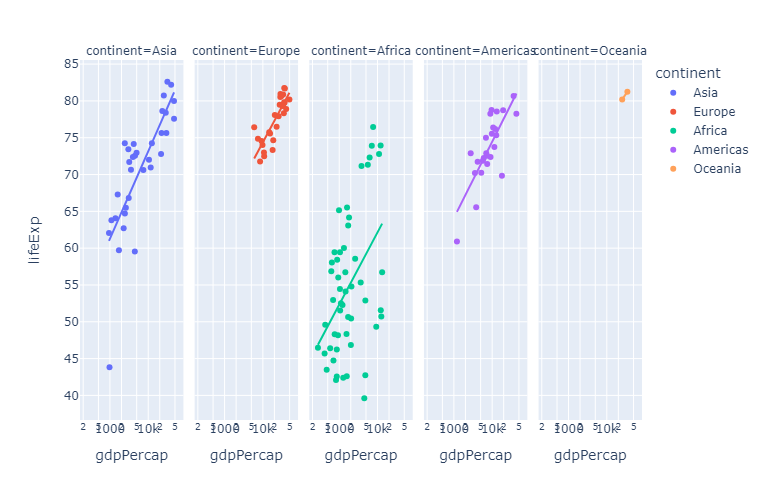

In [47]:
fig = px.scatter(df.query("year == 2007"), 
                 x="gdpPercap", y="lifeExp", 
                 log_x=True, 
                 width=600, height=500,
                 trendline_options=dict(log_x=True),
                 facet_col="continent", 
                 color="continent", trendline="ols")
fig.write_image("人均GDP和预期寿命关系，2007年，回归, logx，各大洲子图.svg")
fig.show()

## 聚类

In [ ]:
# 根据2007年，平均寿命，人均GDP散点图聚类

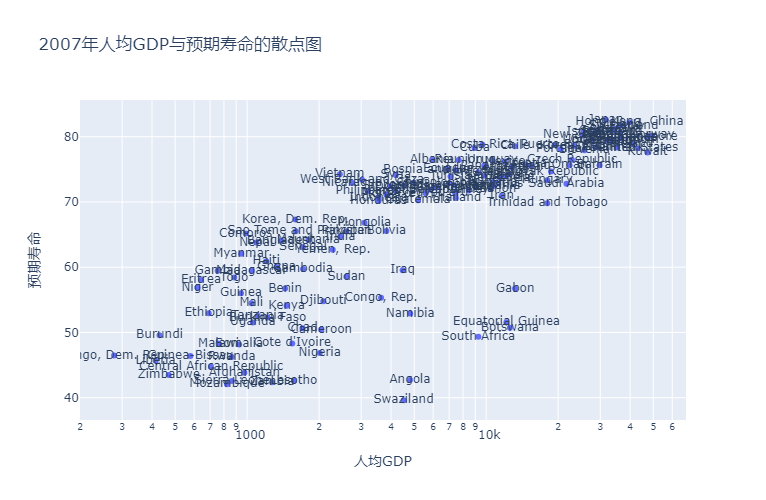

In [150]:
from sklearn.cluster import KMeans

df_2007 = df[df['year'] == 2007]

# 绘制散点图
fig = px.scatter(df_2007, x='gdpPercap', y='lifeExp', text='country_or_territory',
                 title='2007年人均GDP与预期寿命的散点图',
                 width=600, height=500,
                 labels={'gdpPercap': '人均GDP', 'lifeExp': '预期寿命'},
                 size_max=60, log_x=True)
fig.show()

In [151]:
from sklearn.preprocessing import StandardScaler

# 选择需要聚类的特征
features = df_2007[['gdpPercap', 'lifeExp']]

# 标准化这些特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [35]:
features_scaled

array([[-0.8354152 , -1.92673191],
       [-0.44816484,  0.78264648],
       [-0.42582013,  0.44001547],
       [-0.53711029, -2.01791731],
       [ 0.08578574,  0.69096235],
       [ 1.77573537,  1.18263203],
       [ 1.90770425,  1.06576177],
       [ 1.41370083,  0.71714594],
       [-0.80289961, -0.24483093],
       [ 1.71777306,  1.03351024],
       [-0.79899538, -0.85445146],
       [-0.61320287, -0.12081214],
       [-0.33038729,  0.65206101],
       [ 0.06943499, -1.35318655],
       [-0.20400761,  0.44741338],
       [-0.07797987,  0.49853373],
       [-0.81649513, -1.22293357],
       [-0.87790663, -1.4486112 ],
       [-0.77773102, -0.60549953],
       [-0.75211046, -1.37795706],
       [ 1.92274512,  1.13425472],
       [-0.85637288, -1.85084105],
       [-0.77848914, -1.35958699],
       [ 0.11639613,  0.95969744],
       [-0.52447752,  0.49487634],
       [-0.36470122,  0.48889151],
       [-0.83451252, -0.15422739],
       [-0.88980861, -1.7077872 ],
       [-0.62799691,

In [152]:
# 重新应用K-means聚类
kmeans_scaled = KMeans(n_clusters=6, random_state=0).fit(features_scaled)
clusters_scaled = kmeans_scaled.predict(features_scaled)

# 将聚类结果添加到数据中
df_2007['cluster_scaled'] = clusters_scaled

C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\james\AppData\Local\Temp\ipykernel_4532\2793336226.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



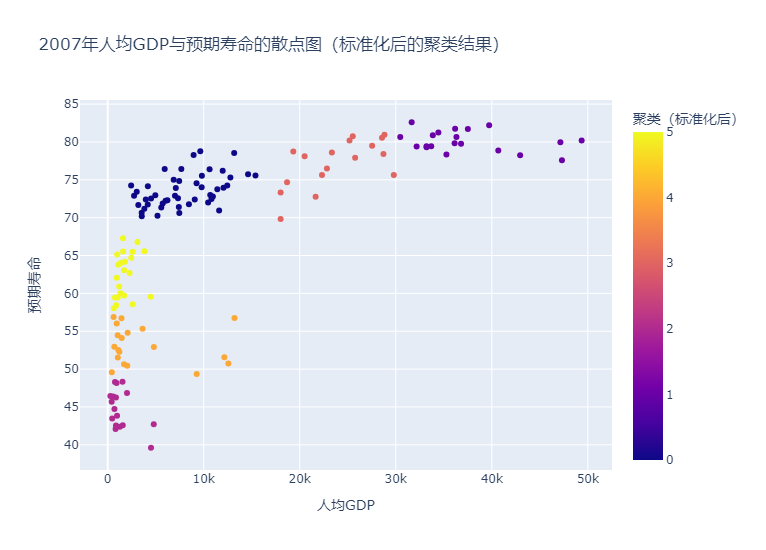

In [156]:
# 重新绘制散点图，这次使用标准化后的聚类结果
fig = px.scatter(df_2007, x='gdpPercap', y='lifeExp', color='cluster_scaled', 
                                title='2007年人均GDP与预期寿命的散点图（标准化后的聚类结果）',
                                hover_name = 'country_or_territory',
                                width=600, height=550,
                                labels={'gdpPercap': '人均GDP', 'lifeExp': '预期寿命', 'cluster_scaled': '聚类（标准化后）'},
                                size_max=60, log_x=False)
fig.write_image("聚类.svg")
fig.show()